# Linear Model Selection & Regularization

### Loading Libraries

In [4]:
# Numerical Computing
import numpy as np

# Data Manipulation
import pandas as pd

# Data Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots

# StatsModel
from statsmodels.api import OLS

# Scikit-Learn
import sklearn
import sklearn.linear_model as skl
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import sklearn.model_selection as skm
from sklearn.preprocessing import StandardScaler
from sklearn.cross_decomposition import PLSRegression

In [7]:
import sklearn
print(sklearn.__version__)

1.7.2


In [13]:
# ISLP - Custom Libraries
from ISLP import load_data
from functools import partial
from ISLP.models import ModelSpec as MS
from ISLP.models import \
(Stepwise ,
sklearn_selected ,
sklearn_selection_path )

In [16]:
!pip install l0bnb

# !pip install git+https://github.com/joshmaxey/l0bnb
from l0bnb import fit_path

### Subset Selection Methods

#### Forward Selection

In [19]:
Hitters = load_data('Hitters')

np.isnan(Hitters['Salary']).sum()

59

In [22]:
Hitters = Hitters.dropna();
Hitters.shape

(263, 20)

In [25]:
def nCp(sigma2, estimator, X, Y):
    "Negative Cp statistic"
    n, p = X.shape
    Yhat = estimator .predict(X)
    RSS = np.sum ((Y - Yhat)**2)
    return -(RSS + 2 * p * sigma2) / n

In [28]:
design = MS(Hitters.columns.drop('Salary')).fit(Hitters)

Y = np.array(Hitters['Salary'])
X = design. transform (Hitters)

sigma2 = OLS(Y, X).fit().scale

In [31]:
neg_Cp = partial(nCp , sigma2)

In [37]:
strategy = Stepwise . first_peak (design ,
direction ='forward',
max_terms =len(design.terms))

In [40]:
hitters_MSE = sklearn_selected(OLS, strategy )
hitters_MSE.fit(Hitters, Y)

hitters_MSE.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Errors',
 'Hits',
 'HmRun',
 'League',
 'NewLeague',
 'PutOuts',
 'RBI',
 'Runs',
 'Walks',
 'Years')

In [43]:
hitters_Cp = sklearn_selected (OLS, strategy, scoring=neg_Cp)

hitters_Cp.fit(Hitters, Y)
hitters_Cp.selected_state_

('Assists',
 'AtBat',
 'CAtBat',
 'CRBI',
 'CRuns',
 'CWalks',
 'Division',
 'Hits',
 'PutOuts',
 'Walks')

#### Choosing Among Models Using the Validation Set Approach & Cross-Validation

In [46]:
strategy=Stepwise.fixed_steps(design, len(design.terms), direction ='forward')

full_path=sklearn_selection_path(OLS, strategy)

In [49]:
full_path .fit(Hitters, Y)
Yhat_in = full_path .predict(Hitters)
Yhat_in.shape

(263, 20)

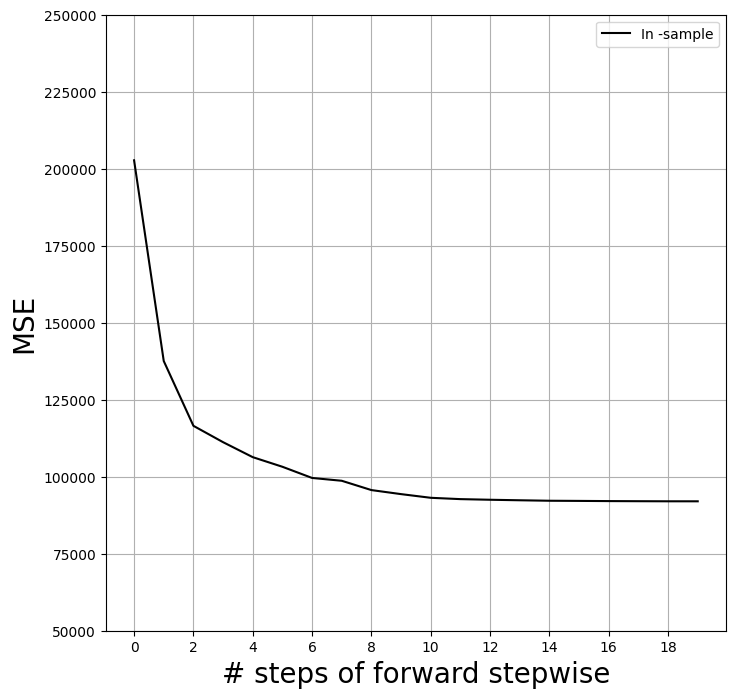

In [52]:
mse_fig, ax=subplots (figsize=(8 ,8))

insample_mse=(( Yhat_in - Y[:, None]) **2).mean (0)
n_steps = insample_mse .shape[0]
ax.plot(np.arange(n_steps), insample_mse ,'k', label='In -sample')
ax. set_ylabel ('MSE', fontsize =20)
ax. set_xlabel('# steps of forward stepwise',
fontsize =20)
ax. set_xticks(np.arange(n_steps)[::2])
ax.legend()
ax. set_ylim([50000 ,250000]);
plt.grid(True)
plt.show()

In [55]:
K = 5

kfold = skm.KFold(K,
                  random_state =0,
                  shuffle=True)

Yhat_cv = skm. cross_val_predict (full_path,
                                  Hitters,
                                  Y,
                                  cv=kfold)
Yhat_cv.shape

(263, 20)

In [58]:
cv_mse = []

for train_idx , test_idx in kfold.split(Y):
    errors = (Yhat_cv[ test_idx ] - Y[test_idx ,None ]) **2
    cv_mse.append(errors.mean (0)) # Column Means

cv_mse = np.array(cv_mse).T
cv_mse.shape

(20, 5)

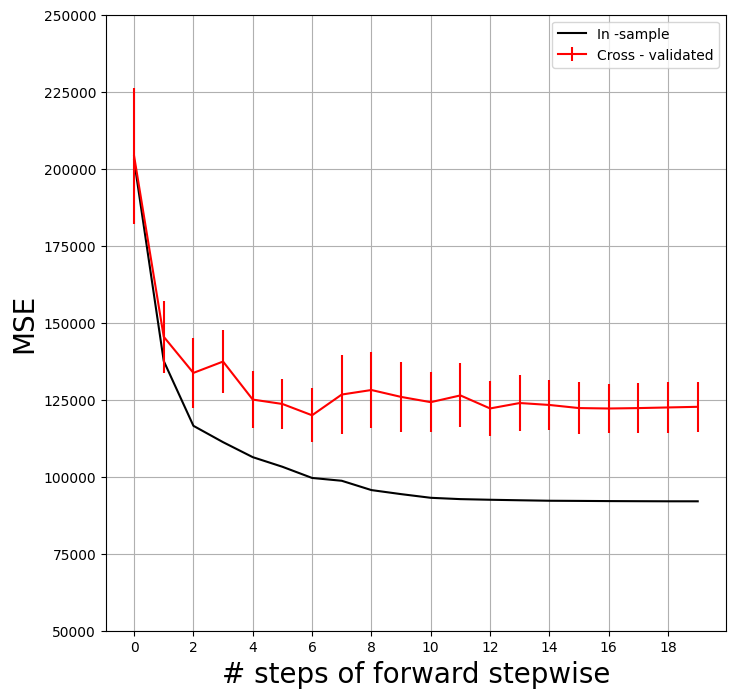

In [61]:
ax. errorbar(np.arange(n_steps),
             cv_mse.mean (1),
             cv_mse.std (1) / np.sqrt(K),
             label='Cross - validated',
             c='r')

ax. set_ylim ([50000 ,250000])
ax.legend ()
mse_fig
# plt.grid(True)
# plt.show()

In [64]:
validation = skm. ShuffleSplit (n_splits =1,
                                test_size =0.2,
                                random_state =0)

for train_idx , test_idx in validation .split(Y):
    full_path .fit(Hitters.iloc[train_idx],
                   Y[ train_idx])

Yhat_val = full_path .predict(Hitters.iloc[ test_idx])
errors = ( Yhat_val - Y[test_idx ,None])**2
validation_mse = errors.mean(0)

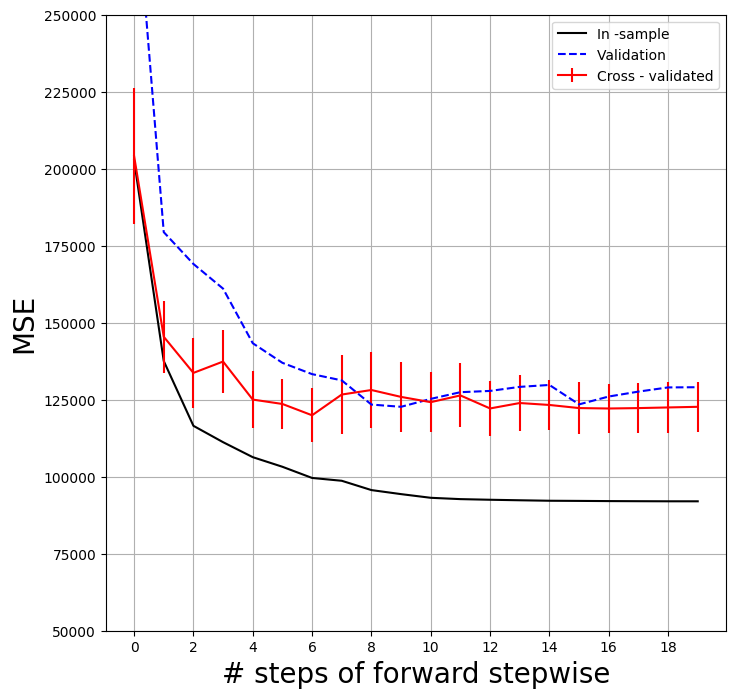

In [67]:
ax.plot(np.arange(n_steps),
        validation_mse,
        'b--', 
        label='Validation ')

ax. set_xticks(np.arange(n_steps)[::2])
ax. set_ylim([50000 ,250000])
ax.legend()
mse_fig

#### Best Subset Selection

In [70]:
D = design.fit_transform(Hitters)
D = D.drop('intercept', axis =1)

X = np.asarray(D)

In [73]:
path = fit_path(X,
                Y,
                max_nonzeros =X.shape[1])

Preprocessing Data.
BnB Started.
Iteration: 1. Number of non-zeros:  1
Iteration: 2. Number of non-zeros:  2
Iteration: 3. Number of non-zeros:  2
Iteration: 4. Number of non-zeros:  2
Iteration: 5. Number of non-zeros:  3
Iteration: 6. Number of non-zeros:  3
Iteration: 7. Number of non-zeros:  4
Iteration: 8. Number of non-zeros:  9
Iteration: 9. Number of non-zeros:  9
Iteration: 10. Number of non-zeros:  9
Iteration: 11. Number of non-zeros:  9
Iteration: 12. Number of non-zeros:  9
Iteration: 13. Number of non-zeros:  9
Iteration: 14. Number of non-zeros:  9
Iteration: 15. Number of non-zeros:  9
Iteration: 16. Number of non-zeros:  9
Iteration: 17. Number of non-zeros:  9
Iteration: 18. Number of non-zeros:  17
Iteration: 19. Number of non-zeros:  19


In [76]:
path[3]

{'B': array([0.        , 3.25484367, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.67775265, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        ]),
 'B0': -38.98216739555505,
 'lambda_0': 0.011416248027450187,
 'M': 0.5829861733382012,
 'Time_exceeded': False}

### Ridge Regression and the Lasso

#### Ridge Regression

In [79]:
Xs = X - X.mean(0)[None, :]
X_scale = X.std(0)
Xs = Xs / X_scale[None, :]
lambdas = 10** np.linspace(8, -2, 100) / Y.std()
soln_array = skl. ElasticNet.path(Xs ,
                                   Y,
                                   l1_ratio =0.,
                                   alphas=lambdas)[1]

soln_array .shape

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.443e+07, tolerance: 1.289e+04
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordi

(19, 100)

In [82]:
soln_path= pd.DataFrame(soln_array.T,
columns= D.columns,
                        index=-np.log(lambdas))

soln_path .index.name = 'negative log(lambda)'
soln_path

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League[N],Division[W],PutOuts,Assists,Errors,NewLeague[N]
negative log(lambda),,,,,,,,,,,,,,,,,,,
-12.310855,0.000800,0.000889,0.000695,0.000851,0.000911,0.000900,0.000812,0.001067,0.001113,0.001064,0.001141,0.001149,0.000993,-0.000029,-0.000390,0.000609,0.000052,-0.000011,-0.000006
-12.078271,0.001010,0.001122,0.000878,0.001074,0.001150,0.001135,0.001025,0.001346,0.001404,0.001343,0.001439,0.001450,0.001253,-0.000037,-0.000492,0.000769,0.000065,-0.000014,-0.000007
-11.845686,0.001274,0.001416,0.001107,0.001355,0.001451,0.001433,0.001293,0.001698,0.001772,0.001694,0.001816,0.001830,0.001581,-0.000046,-0.000621,0.000970,0.000082,-0.000017,-0.000009
-11.613102,0.001608,0.001787,0.001397,0.001710,0.001831,0.001808,0.001632,0.002143,0.002236,0.002138,0.002292,0.002309,0.001995,-0.000058,-0.000784,0.001224,0.000104,-0.000022,-0.000012
-11.380518,0.002029,0.002255,0.001763,0.002158,0.002310,0.002281,0.002059,0.002704,0.002821,0.002698,0.002892,0.002914,0.002517,-0.000073,-0.000990,0.001544,0.000131,-0.000028,-0.000015
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9.784658,-290.823989,336.929968,37.322686,-59.748520,-26.507086,134.855915,-17.216195,-387.775826,89.573601,-12.273926,476.079273,257.271255,-213.124780,31.258215,-58.457857,78.761266,53.622113,-22.208456,-12.402891
10.017243,-290.879272,337.113713,37.431373,-59.916820,-26.606957,134.900549,-17.108041,-388.458404,89.000707,-12.661459,477.031349,257.966790,-213.280891,31.256434,-58.448850,78.761240,53.645147,-22.198802,-12.391969
10.249827,-290.923382,337.260446,37.518064,-60.051166,-26.686604,134.936136,-17.022194,-388.997470,88.537380,-12.971603,477.791860,258.523025,-213.405740,31.254958,-58.441682,78.761230,53.663357,-22.191071,-12.383205


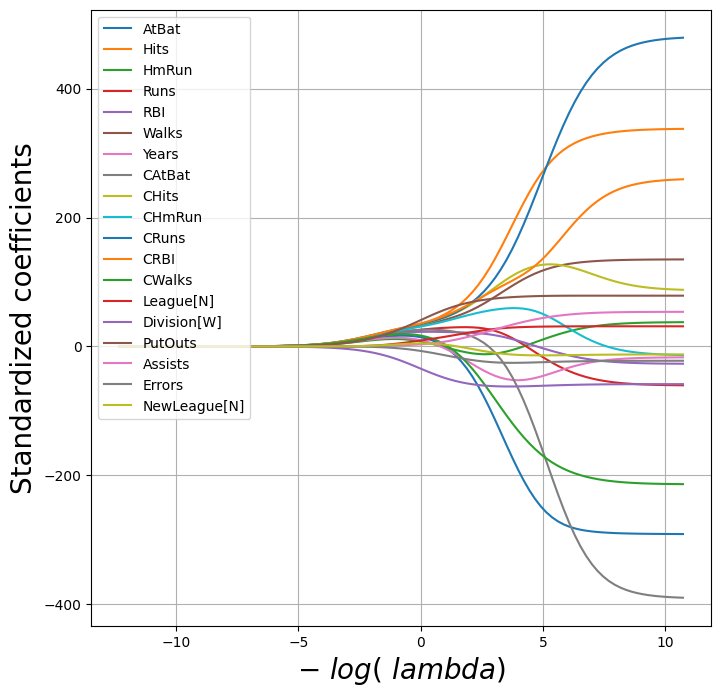

In [85]:
path_fig , ax = subplots(figsize=(8, 8))

soln_path .plot(ax=ax, legend=False)
ax. set_xlabel ('$-\ log (\ lambda)$', fontsize =20)
ax. set_ylabel ('Standardized coefficients', fontsize =20)
ax.legend(loc='upper left');
plt.grid(True)
plt.show()

In [88]:
beta_hat = soln_path .loc[ soln_path .index [39]]
lambdas[39], beta_hat

(25.53538897200662,
 AtBat           5.433750
 Hits            6.223582
 HmRun           4.585498
 Runs            5.880855
 RBI             6.195921
 Walks           6.277975
 Years           5.299767
 CAtBat          7.147501
 CHits           7.539495
 CHmRun          7.182344
 CRuns           7.728649
 CRBI            7.790702
 CWalks          6.592901
 League[N]       0.042445
 Division[W]    -3.107159
 PutOuts         4.605263
 Assists         0.378371
 Errors         -0.135196
 NewLeague[N]    0.150323
 Name: -3.240065292879872, dtype: float64)

In [91]:
np.linalg.norm(beta_hat)

24.170617201443775

In [94]:
beta_hat = soln_path.loc[soln_path.index [59]]

lambdas[59], np.linalg.norm(beta_hat)

(0.2437476613348855, 160.4237101772597)

In [97]:
ridge = skl.ElasticNet(alpha=lambdas[59], l1_ratio =0)
scaler = StandardScaler(with_mean =True, with_std =True)

pipe = Pipeline(steps =[('scaler', scaler), ('ridge', ridge)])
pipe.fit(X, Y)

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.446e+07, tolerance: 5.332e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.2437476613348855
,l1_ratio,0
,fit_intercept,True
,precompute,False


In [100]:
np.linalg.norm(ridge.coef_)

160.42371017725912

#### Estimating Test Error of Ridge Regression

In [106]:
validation = skm.ShuffleSplit(n_splits=1, test_size =0.5, random_state=0)
ridge.alpha = 0.01
results = skm.cross_validate(ridge, X, Y, scoring='neg_mean_squared_error', cv=validation)

-results['test_score']

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.486e+06, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([134214.00419204])

In [112]:
ridge.alpha = 1e10

results = skm.cross_validate(ridge,
                             X,
                             Y,
                             scoring='neg_mean_squared_error',
                             cv= validation)

-results['test_score']

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(


array([231788.32155285])

In [115]:
param_grid = {'ridge__alpha': lambdas}

grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=validation,
                        scoring='neg_mean_squared_error')

grid.fit(X, Y)
grid. best_params_ ['ridge__alpha']
grid. best_estimator_

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.136e+07, tolerance: 2.272e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.005899006046740854
,l1_ratio,0
,fit_intercept,True
,precompute,False


In [118]:
grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

grid.fit(X, Y)
grid. best_params_['ridge__alpha']
grid. best_estimator_

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+07, tolerance: 4.445e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+07, tolerance: 4.437e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

,steps,"[('scaler', ...), ('ridge', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,alpha,0.011852477631442489
,l1_ratio,0
,fit_intercept,True
,precompute,False


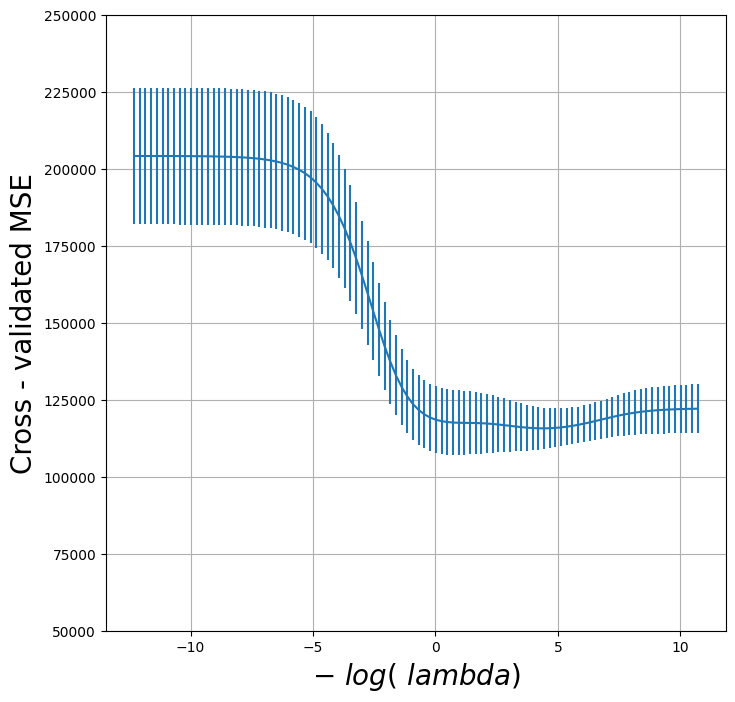

In [122]:
ridge_fig , ax = subplots (figsize =(8 ,8))

ax. errorbar (-np.log(lambdas), -grid. cv_results_ ['mean_test_score'], yerr=grid. cv_results_ ['std_test_score'] / np.sqrt(K))
ax. set_ylim ([50000 ,250000])
ax. set_xlabel('$-\ log (\ lambda)$', fontsize =20)
ax. set_ylabel('Cross - validated MSE', fontsize =20);
plt.grid(True)
plt.show()

In [125]:
grid_r2 = skm. GridSearchCV (pipe,
                             param_grid,
                             cv=kfold)

grid_r2.fit(X, Y)

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.161e+07, tolerance: 4.445e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.149e+07, tolerance: 4.437e+03
Linear regression models with a zero l1 penalization strength are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instea

,estimator,Pipeline(step...l1_ratio=0))])
,param_grid,{'ridge__alpha': array([2.2209...22093791e-05])}
,scoring,None
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


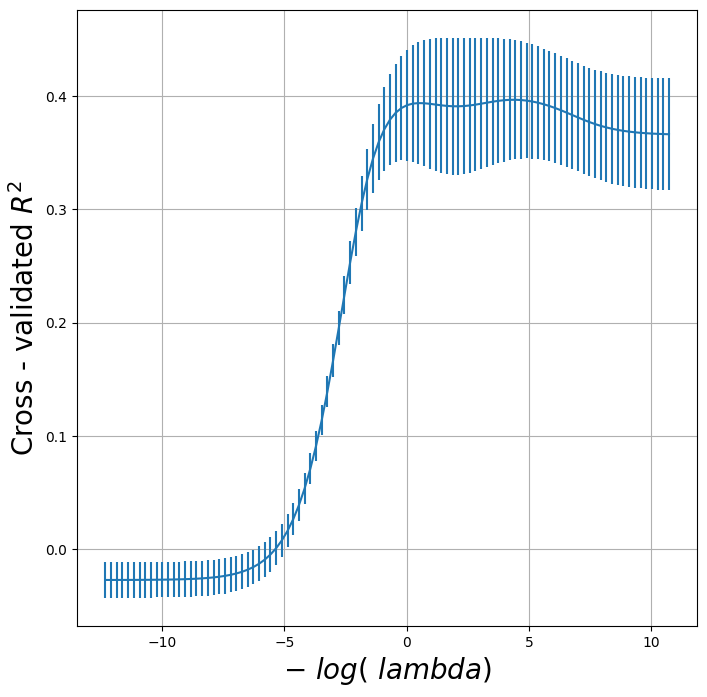

In [131]:
r2_fig , ax = subplots(figsize =(8 ,8))

ax. errorbar (-np.log(lambdas),
              grid_r2. cv_results_ ['mean_test_score'],
              yerr=grid_r2. cv_results_ ['std_test_score'] / np.sqrt(K))

ax. set_xlabel ('$-\ log (\ lambda)$', fontsize =20)
ax. set_ylabel ('Cross - validated $R^2$', fontsize =20);
plt.grid(True)
plt.show()

#### Fast Cross-Validation for Solution Paths

In [134]:
ridgeCV= skl.ElasticNetCV(alphas=lambdas,
                            l1_ratio=0,
                            cv=kfold)

pipeCV= Pipeline (steps =[('scaler', scaler),
                           ('ridge ', ridgeCV)])

pipeCV.fit(X, Y)

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.411e+07, tolerance: 4.466e+03
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordi

,steps,"[('scaler', ...), ('ridge ', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,l1_ratio,0
,eps,0.001
,n_alphas,'deprecated'
,alphas,array([2.2209...22093791e-05])


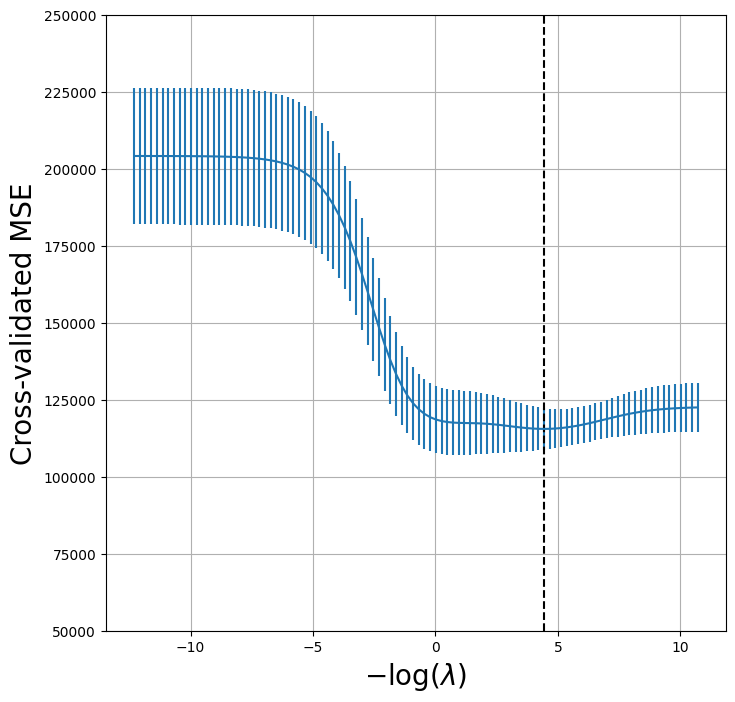

In [146]:
# Correcting the key to 'ridge ' (with a trailing space)
tuned_ridge = pipeCV.named_steps['ridge ']

# Plotting the results
ridgeCV_fig, ax = subplots(figsize=(8, 8))
ax.errorbar(-np.log(lambdas), tuned_ridge.mse_path_.mean(1), yerr=tuned_ridge.mse_path_.std(1) / np.sqrt(K))

ax.axvline(-np.log(tuned_ridge.alpha_), c='k', ls='--')
ax.set_ylim([50000, 250000])
ax.set_xlabel('$-\\log(\\lambda)$', fontsize=20)
ax.set_ylabel('Cross-validated MSE', fontsize=20)
plt.grid(True)
plt.show()

In [149]:
np.min(tuned_ridge.mse_path_.mean(1))

115526.70630987993

In [152]:
tuned_ridge.coef_

array([-222.80877051,  238.77246614,    3.21103754,   -2.93050845,
          3.64888723,  108.90953869,  -50.81896152, -105.15731984,
        122.00714801,   57.1859509 ,  210.35170348,  118.05683748,
       -150.21959435,   30.36634231,  -61.62459095,   77.73832472,
         40.07350744,  -25.02151514,  -13.68429544])

### Evaluating Test Error of Cross-Validated Ridge

In [155]:
outer_valid= skm.ShuffleSplit(n_splits =1,
                              test_size =0.25,
                              random_state =1)

inner_cv= skm.KFold(n_splits =5,
                     shuffle=True ,
                     random_state =2)

ridgeCV= skl.ElasticNetCV(alphas=lambdas,
                           l1_ratio =0,
                           cv= inner_cv)
pipeCV= Pipeline (steps=[('scaler', scaler),
                         ('ridge ', ridgeCV)]);

In [158]:
results = skm.cross_validate(pipeCV,
                             X,
                             Y,
                             cv=outer_valid,
                             scoring='neg_mean_squared_error')

-results['test_score']

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.002e+07, tolerance: 3.200e+03
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:681: UserWarning: Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.
  model = cd_fast.enet_coordinate_descent_gram(
/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordi

array([132393.84003227])

#### The Lasso

In [164]:
lassoCV = skl.ElasticNetCV(n_alphas =100,
                           l1_ratio =1,
                           cv=kfold)

pipeCV= Pipeline(steps=[('scaler', scaler),
                        ('lasso', lassoCV)])

pipeCV.fit(X, Y)
tuned_lasso= pipeCV.named_steps['lasso']
tuned_lasso.alpha_

/root/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:1622: FutureWarning: 'n_alphas' was deprecated in 1.7 and will be removed in 1.9. 'alphas' now accepts an integer value which removes the need to pass 'n_alphas'. The default value of 'alphas' will change from None to 100 in 1.9. Pass an explicit value to 'alphas' and leave 'n_alphas' to its default value to silence this warning.
  warnings.warn(


3.1472370031649866

In [167]:
lambdas, soln_array= skl.Lasso.path(Xs,
                                    Y,
                                    l1_ratio =1,
                                    n_alphas =100) [:2]

soln_path = pd.DataFrame( soln_array.T,
                          columns=D.columns ,
                          index=-np.log(lambdas))

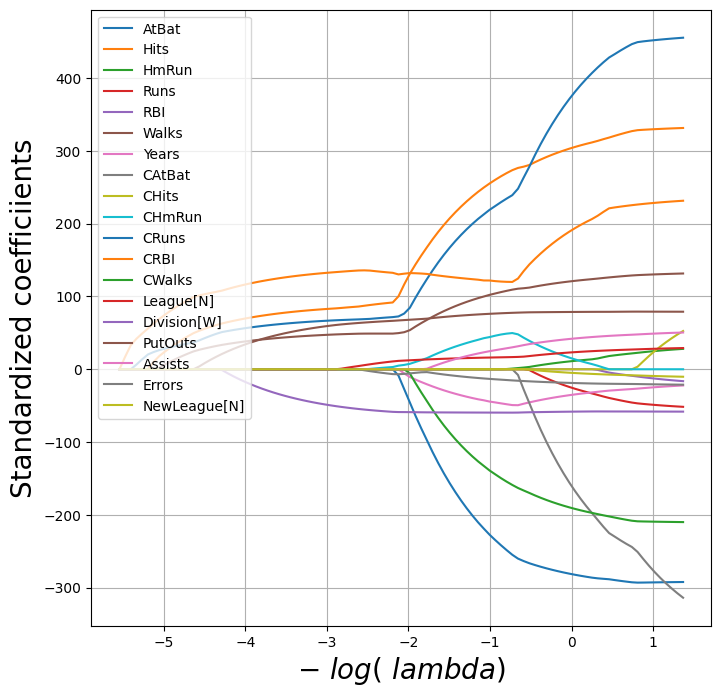

In [173]:
path_fig, ax= subplots(figsize=(8 ,8))
soln_path.plot(ax=ax, legend=False)
ax.legend(loc='upper left')
ax. set_xlabel ('$-\ log (\ lambda)$', fontsize =20)
ax. set_ylabel ('Standardized coefficiients', fontsize =20);
plt.grid(True)
plt.show()

In [176]:
np.min(tuned_lasso.mse_path_.mean(1))

114690.73118253637

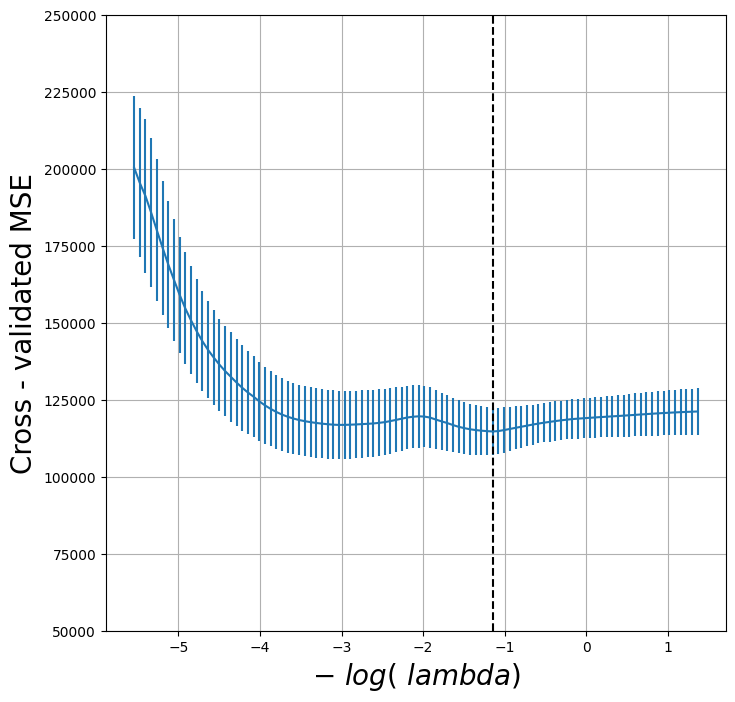

In [185]:
lassoCV_fig, ax= subplots(figsize=(8 ,8))

ax. errorbar(-np.log(tuned_lasso.alphas_),
             tuned_lasso.mse_path_.mean(1),
             yerr=tuned_lasso.mse_path_.std(1) / np.sqrt(K))
ax.axvline(-np.log( tuned_lasso .alpha_), c='k', ls='--')
ax. set_ylim([50000 ,250000])
ax. set_xlabel('$-\ log (\ lambda)$', fontsize =20)
ax. set_ylabel('Cross - validated MSE', fontsize =20);
plt.grid(True)
plt.show()

In [188]:
tuned_lasso.coef_

array([-210.01008773,  243.4550306 ,    0.        ,    0.        ,
          0.        ,   97.69397357,  -41.52283116,   -0.        ,
          0.        ,   39.62298193,  205.75273856,  124.55456561,
       -126.29986768,   15.70262427,  -59.50157967,   75.24590036,
         21.62698014,  -12.04423675,   -0.        ])

### PCR and PLS Regression

#### Principal Components Regression

In [191]:
pca= PCA(n_components =2)

linreg= skl.LinearRegression()

pipe= Pipeline([('pca', pca),
                ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([0.09846131, 0.4758765 ])

In [194]:
pipe = Pipeline([('scaler', scaler),
                 ('pca', pca),
                 ('linreg', linreg)])
pipe.fit(X, Y)
pipe.named_steps['linreg'].coef_

array([106.36859204,  21.60350456])

In [197]:
param_grid = {'pca__n_components': range (1, 20)}

grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,

                        scoring='neg_mean_squared_error')
grid.fit(X, Y)

,estimator,Pipeline(step...egression())])
,param_grid,"{'pca__n_components': range(1, 20)}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,copy,True


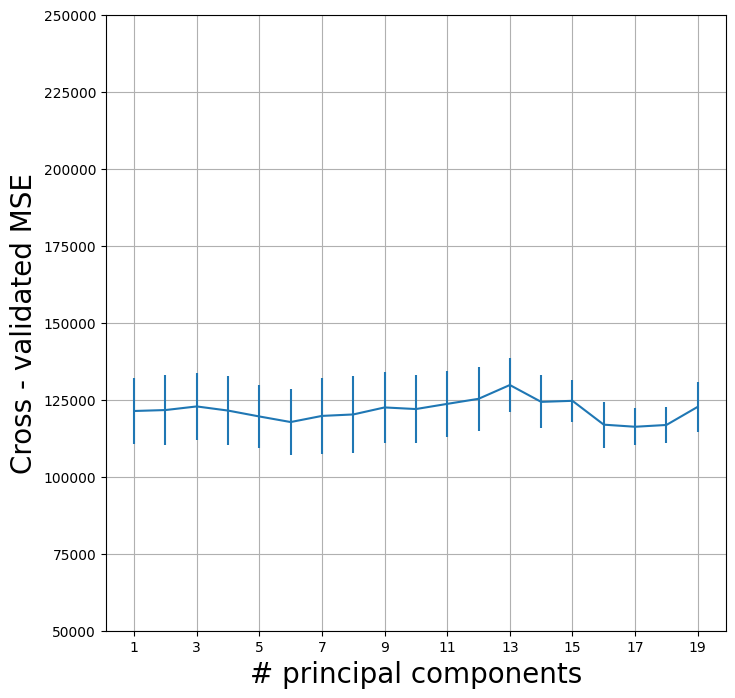

In [203]:
pcr_fig, ax= subplots(figsize =(8 ,8))

n_comp= param_grid['pca__n_components']
ax. errorbar (n_comp,
              -grid. cv_results_ ['mean_test_score'],
              grid. cv_results_ ['std_test_score'] / np.sqrt(K))

ax. set_ylabel ('Cross - validated MSE', fontsize =20)
ax. set_xlabel ('# principal components', fontsize =20)
ax. set_xticks (n_comp [::2])
ax. set_ylim ([50000 ,250000]);
plt.grid(True)
plt.show()

In [206]:
Xn = np.zeros((X.shape [0], 1))

cv_null = skm.cross_validate(linreg,
                             Xn,
                             Y,
                             cv=kfold,
                             scoring='neg_mean_squared_error')

-cv_null['test_score'].mean()

204139.30692994667

In [209]:
pipe.named_steps['pca'].explained_variance_ratio_

array([0.3831424 , 0.21841076])

#### Partial Least Squares

In [212]:
pls= PLSRegression(n_components=2,
                   scale=True)

pls.fit(X, Y)

,n_components,2
,scale,True
,max_iter,500
,tol,1e-06
,copy,True


In [215]:
param_grid = {'n_components':range(1, 20)}

grid = skm.GridSearchCV(pls,
                        param_grid,
                        cv=kfold,
                        scoring='neg_mean_squared_error')

grid.fit(X, Y)

,estimator,PLSRegression()
,param_grid,"{'n_components': range(1, 20)}"
,scoring,'neg_mean_squared_error'
,n_jobs,None
,refit,True
,cv,KFold(n_split... shuffle=True)
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_components,12


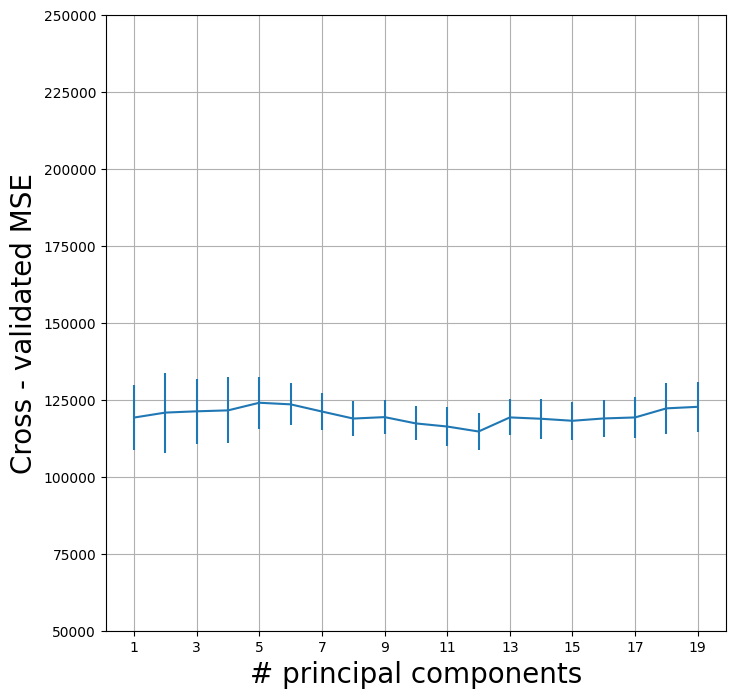

In [221]:
pls_fig , ax = subplots(figsize=(8 ,8))

n_comp= param_grid ['n_components']

ax. errorbar(n_comp,
             -grid. cv_results_['mean_test_score'],
             grid. cv_results_['std_test_score'] / np.sqrt(K))
ax.set_ylabel ('Cross - validated MSE', fontsize =20)
ax.set_xlabel ('# principal components', fontsize =20)
ax.set_xticks (n_comp [::2])
ax.set_ylim ([50000 ,250000]);
plt.grid(True)
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=0d3119b6-252a-4a5e-a15d-ac179b275327' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>